<a href="https://colab.research.google.com/github/markiroberts/gogglecolab01/blob/main/Model0_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib as plt

# Check PyTorch Version
torch.__version__

'2.1.0+cu121'

In [2]:
def plot_predictions(xtrain, ytrain, xtest, ytest, predictions=None):

  plt.pyplot.figure(figsize=(10,7))
  plt.pyplot.scatter(xtrain, ytrain,  c="b", s=4,   marker=".", label="Training data")
  plt.pyplot.scatter(xtest,  ytest,   c="g", s=4,  marker=".", label="Testing data")
  if predictions is not None:
    titletext = f"Element counts Training: {len(xtrain)}, Test: {len(xtest)}, Predictions:{len(predictions)}"
    plt.pyplot.scatter(xtest, predictions,   c="r", s=4,  marker=".", label="Predictions")
  else:
    titletext = f"Element counts Training: {len(xtrain)}, Test: {len(xtest)}, Predictions: None"

  plt.pyplot.legend(prop={"size": 14})
  plt.pyplot.title(titletext)

In [3]:
def plot_loss(epochlist, train_losslist, test_losslist):

  plt.pyplot.figure(figsize=(10,7))
  plt.pyplot.scatter(epochlist, train_losslist,  c="b", s=4,   marker=".", label="Training")
  plt.pyplot.scatter(epochlist, test_losslist,   c="r", s=4,   marker=".", label="Test")
  titletext = f"Loss vs. Epoch"

  plt.pyplot.legend(prop={"size": 14})
  plt.pyplot.title(titletext)

In [4]:
def show_model(themodel):
  for x in themodel.state_dict().items():
    for y in x:
      print (y, sep=" ", end="")
      print("\t", end="")
    print (" ")


##Create device-agnostic code

This means if we've got access to a GPU, our code will use

In [5]:
# Setup device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Device: {device}")

Device: cuda


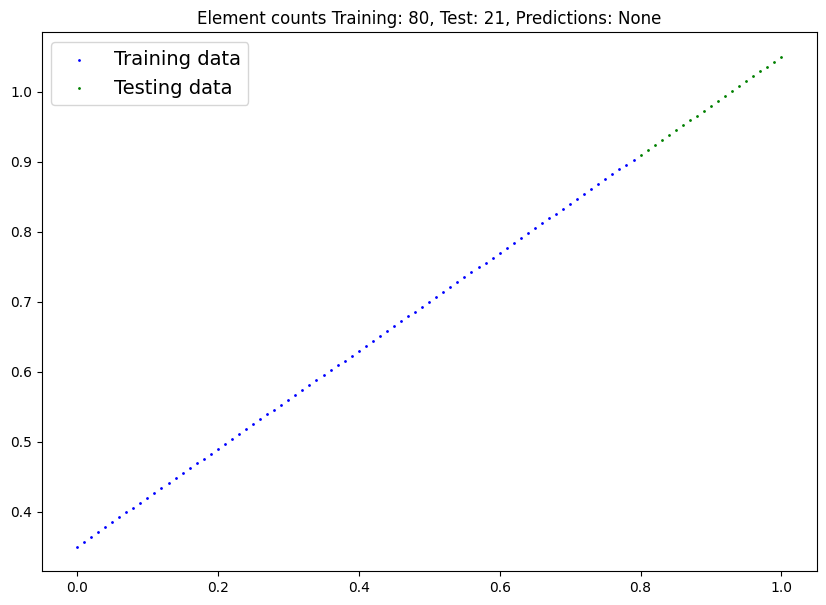

In [6]:
# Create a known graph
weight = 0.7
bias = 0.35

# Create
start = 0
step = 0.01
end = 1
# unsqueeze (dim=1) turns into a column? vector

#x_train = np.array(x_values, dtype=np.float32)


X = torch.arange(start, end+step, step).unsqueeze(dim=1)
y = weight * abs(X) + bias

# Create training set
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test   = X[train_split:], y[train_split:]

plot_predictions(X_train, y_train, X_test, y_test )

### Create a mode
use a linear model

In [7]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
#        weight = self.state_dict().get("linear.weight")
#        bias   = self.state_dict().get("linear.bias")
#        print(f"Linear weight: {weight}")
#        out = x * weight + bias
        return out

Create our model

Epoch: 0, Loss: 1.9436588287353516, Loss Test: 2.9857702255249023
Epoch: 2000, Loss: 9.506758215138689e-05, Loss Test: 0.0004240268317516893
Epoch: 4000, Loss: 2.4264836611109786e-06, Loss Test: 1.0822955118783284e-05
Epoch: 6000, Loss: 6.204221847383451e-08, Loss Test: 2.765271744920028e-07
Epoch: 8000, Loss: 1.6560312010582834e-09, Loss Test: 7.30731208875568e-09
Epoch: 10000, Loss: 6.017699533122922e-11, Loss Test: 2.6476851266998835e-10
Epoch: 12000, Loss: 6.017699533122922e-11, Loss Test: 2.6476851266998835e-10
Epoch: 14000, Loss: 6.017699533122922e-11, Loss Test: 2.6476851266998835e-10
Epoch: 16000, Loss: 6.017699533122922e-11, Loss Test: 2.6476851266998835e-10
Epoch: 18000, Loss: 6.017699533122922e-11, Loss Test: 2.6476851266998835e-10
Final Model
linear.weight	tensor([[0.7000]])	 
linear.bias	tensor([0.3500])	 


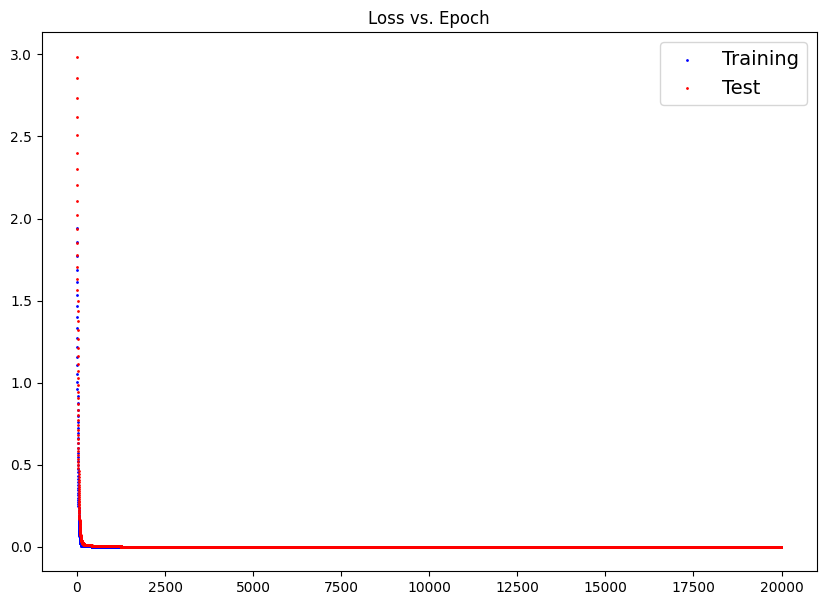

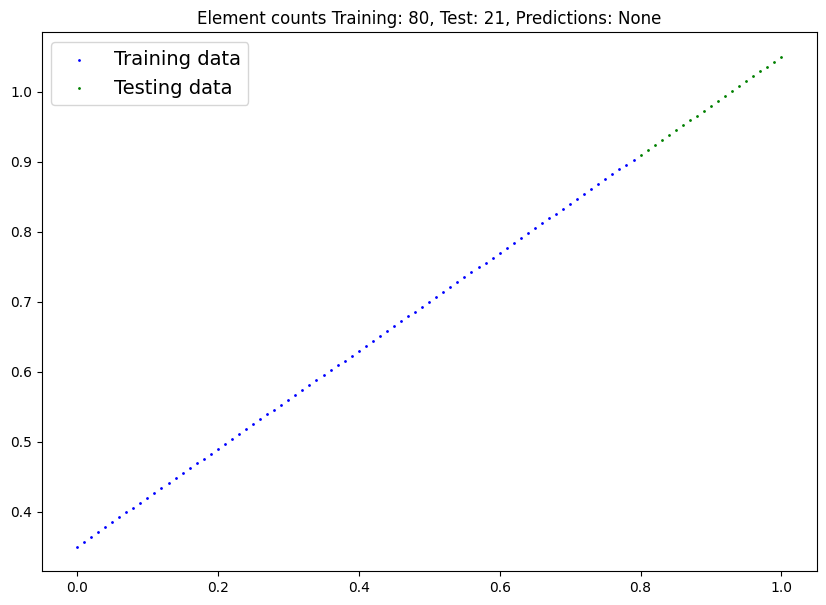

In [9]:
inputDim = 1        # takes variable 'x'
outputDim = 1       # takes variable 'y'
learningRate = 0.01
epochs = 20000
model_0 = linearRegression(inputDim,outputDim)
model_0

loss_list = []
test_loss_list = []
epoch_list = []

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=learningRate)

for epoch in range(epochs):
  optimizer.zero_grad()
# get output from the model, given the inputs
  outputs = model_0(X_train)

# get loss for the predicted output
  loss = criterion(outputs, y_train)
# get gradients w.r.t to parameters
  loss.backward()
# update parameters
  optimizer.step()

# test model
  with torch.no_grad():
    outputs_test = model_0(X_test)
    # get loss for the predicted output
    loss_test = criterion(outputs_test, y_test)

  epoch_list.append(epoch)
  loss_list.append(loss.item())
  test_loss_list.append(loss_test.item())

  if (epoch % int(epochs/10) == 0):
    print (f"Epoch: {epoch}, Loss: {loss.item()}, Loss Test: {loss_test.item()}")

plot_loss(epoch_list, loss_list, test_loss_list)

print("Final Model")
show_model(model_0)

plot_predictions(X_train, y_train, X_test, outputs_test )


In [11]:
with torch.no_grad():
  X_train_test = torch.cat((X_train, X_test))
  y_train_test = torch.cat((y_train, y_test))
  outputs_test = model_0(X_train_test)
  # get loss for the predicted output
  loss_test = criterion(outputs_test, y_train_test)
  print(loss_test)

  show_model(model_0)

tensor(1.0272e-10)
linear.weight	tensor([[0.7000]])	 
linear.bias	tensor([0.3500])	 


In [12]:
x = torch.tensor([[0.0],[0.1],[0.2],[0.3]])
with torch.no_grad():
  y = model_0.linear(x)
print(x)
print(y)
print(model_0.state_dict())
weight = model_0.state_dict().get("linear.weight")
bias   = model_0.state_dict().get("linear.bias")
print(weight, bias)

tensor([[0.0000],
        [0.1000],
        [0.2000],
        [0.3000]])
tensor([[0.3500],
        [0.4200],
        [0.4900],
        [0.5600]])
OrderedDict([('linear.weight', tensor([[0.7000]])), ('linear.bias', tensor([0.3500]))])
tensor([[0.7000]]) tensor([0.3500])


In [13]:
# test model
with torch.no_grad():
  outputs_test = model_0(X_test)

X_test

tensor([[0.8000],
        [0.8100],
        [0.8200],
        [0.8300],
        [0.8400],
        [0.8500],
        [0.8600],
        [0.8700],
        [0.8800],
        [0.8900],
        [0.9000],
        [0.9100],
        [0.9200],
        [0.9300],
        [0.9400],
        [0.9500],
        [0.9600],
        [0.9700],
        [0.9800],
        [0.9900],
        [1.0000]])

In [14]:

class Example:
  def __init__(self):
    print("Instance Created this is __init__")

  # Defining __call__ method
  def __call__(self, a=1):
    print(f"Instance is called via special method this is __call__ with a={a}")

  def forward(self):
    print("The forward method")


# Instance created
e = Example()

# __call__ method will be called
e(2)
e.forward()

Instance Created this is __init__
Instance is called via special method this is __call__ with a=2
The forward method
